# **Context**

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

# **Objective**

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

# **Data Dictionary:**

* **visitors:** Average number of visitors, in millions, to the platform in the past week
* **ad_impressions:** Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
* **major_sports_event:** Any major sports event on the day
* **genre:** Genre of the content
* **dayofweek:** Day of the release of the content
* **season:** Season of the release of the content
* **views_trailer:** Number of views, in millions, of the content trailer
* **views_content:** Number of first-day views, in millions, of the content
 

## **Important Note**

**The following questions need to be answered as a part of the EDA section of the project:**

1. What does the distribution of content views look like?
2. What does the distribution of genres look like?
3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?
4. How does the viewership vary with the season of release?
5. What is the correlation between trailer views and content views?

# **Exploratory Data Analysis**

## **Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")


## **Loading the data**

In [4]:
data = pd.read_csv("ottdata.csv")

### Displaying the first few rows and last few rows of the dataset

In [7]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [9]:
data.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


**Observations**

The 8 columns give the details on various driving factors such as `visitors`,`ad_impressions`,`major_sports_event`, `genre`, `dayofweek` ,`season` , `views_trailer`,  that drive the target variable, the `views_content`. 

### Checking the shape of the dataset

In [13]:
data.shape

(1000, 8)

**Observations**

- There are 1000 rows and 8 columns in the dataset.

### Checking the data types of the columns for the dataset

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


**Observations**

* The dataset consists of 5 numerical columns and 3 object type columns.
* The visitors, ad_impressions, major_sports_event, views_trailer and views_content are the numerical columns of the dataset.
* The genre, dayofweek, and season are the object type columns in the dataset.
* The major_sports_event column describes the details if any major sports event was available on the day and it is being read as integer type.
* But based on its description the column should reveal the category and it can be preferably in categorical format.
* From the information obtained it is observed that there is no missing values in the dataset.

### Checking for missing values

In [21]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

### Statistical summary of the numerical columns of the dataset

In [24]:
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


**Observations**

*	The platform had 1.7 million visitors on an average during the past week, with a minimum of 1.25 million and a maximum of 2.34 million. It is also observed that the 50% of the number of visitors is same as the average number visitors, thus showcasing an even distribution of the number of visitors to the platform during the past week.
*	The `ad impressions` for the content lies between 1010.87 million and 2424.2 million with an average of 1434.7 million.
*	Considering the minimum and maximum values of the `major_sports_event`, it can be concluded that the column needs replacement of its values with “YES” or “NO” categorical values.
*	The number of views of the content trailer ranges between 30.08 million and 199.92 million with an average of 66.91 million. Here the mean value of the `views_trailer` is greater than its median leading to a heavily positive skewed distribution and its maximum view is about 200 million indicating it as an outlier.
*	The number of first day views of the content (`views_content`) lies between 0.22 to 0.89 million with an average of 0.47 million
*	It is also noted that the mean value of the `ad_impressions` and `views_content` is slightly greater than their respective medians, indicating a slightly positively skewed distribution of the data. 
  


### Checking for duplicate values

In [28]:
# checking for duplicate values
data.duplicated().sum()

0

* 	It is also observed that there are no duplicate entries in the dataset.

### Creating a copy of the data 

In [32]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## **Feature Engineering**
**For the column `major_sports_event`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [35]:
df["major_sports_event"] = df["major_sports_event"].replace({1: "YES", 0: "NO"})
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,NO,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,YES,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,YES,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,YES,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,NO,Sci-Fi,Sunday,Winter,55.83,0.46


In [37]:
df.nunique() # Checking the number of distinct values in each of the columns in the data set

visitors               56
ad_impressions         80
major_sports_event      2
genre                   8
dayofweek               7
season                  4
views_trailer         799
views_content          61
dtype: int64

### Checking for anomalous values in categorical variables

In [40]:
df["major_sports_event"].value_counts() # Checking the categorical columns

major_sports_event
NO     600
YES    400
Name: count, dtype: int64

In [42]:
df["genre"].value_counts()

genre
Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: count, dtype: int64

In [44]:
df["season"].value_counts()

season
Winter    257
Fall      252
Spring    247
Summer    244
Name: count, dtype: int64

In [46]:
df["dayofweek"].value_counts()

dayofweek
Friday       369
Wednesday    332
Thursday      97
Saturday      88
Sunday        67
Monday        24
Tuesday       23
Name: count, dtype: int64

* The unique values are determined for each categorical variable to check if any junk/garbage values present in the dataset. This check helps us to identify if any data entry issues are present. From the determined unique values its concluded that there is no data entry issues present.

## **Univariate Analysis**

### **Histogram and Boxplots for numerical columns**

In [51]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### **Visitors**

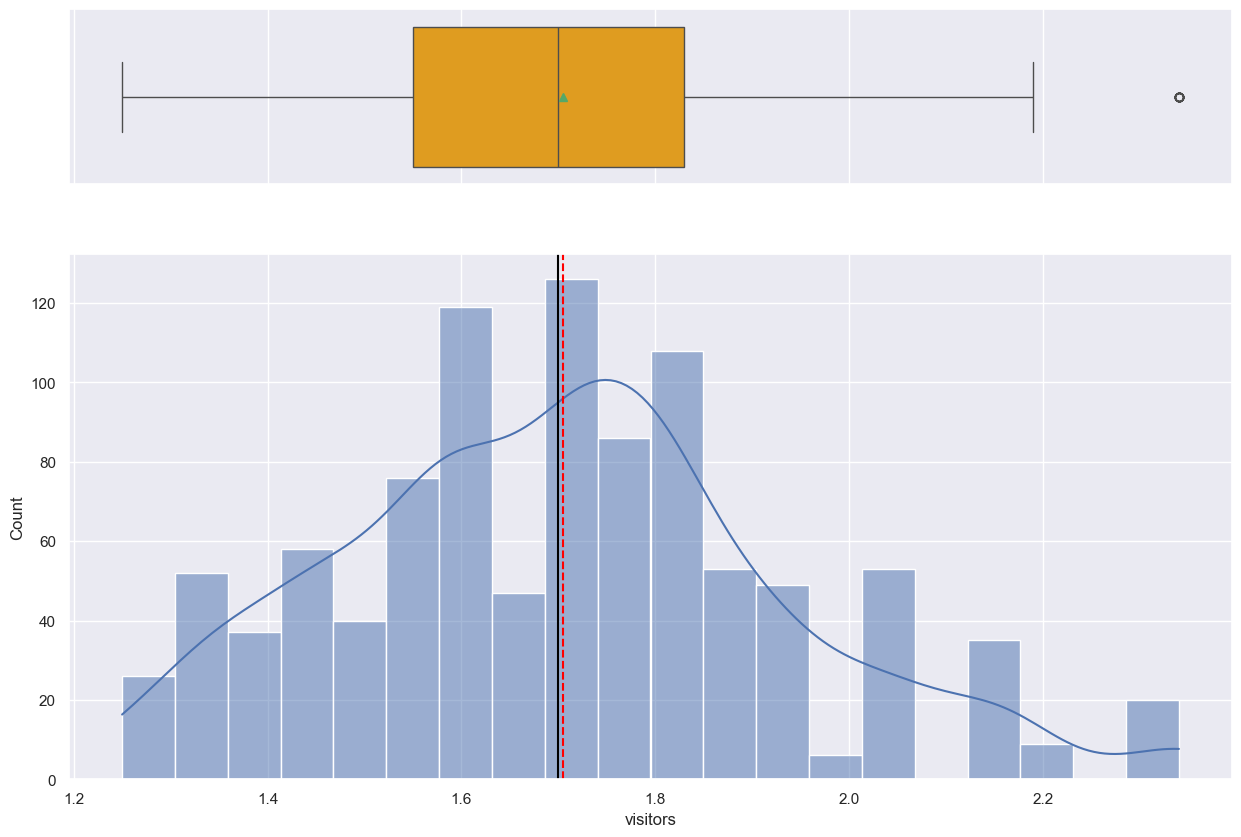

In [54]:
histogram_boxplot(df, "visitors", kde=True)

**Observation**

*	The distribution of the number of visitors is evenly distributed.
*	The mean is approximately equal to the median no. of visitors.
*	The median no. of visitors of the platform is around 1.7 million during the past week.
*	Sometimes about 2.3 million visitors visit and this count is considered to be an outlier value in this data set.

### **Ad_impressions**

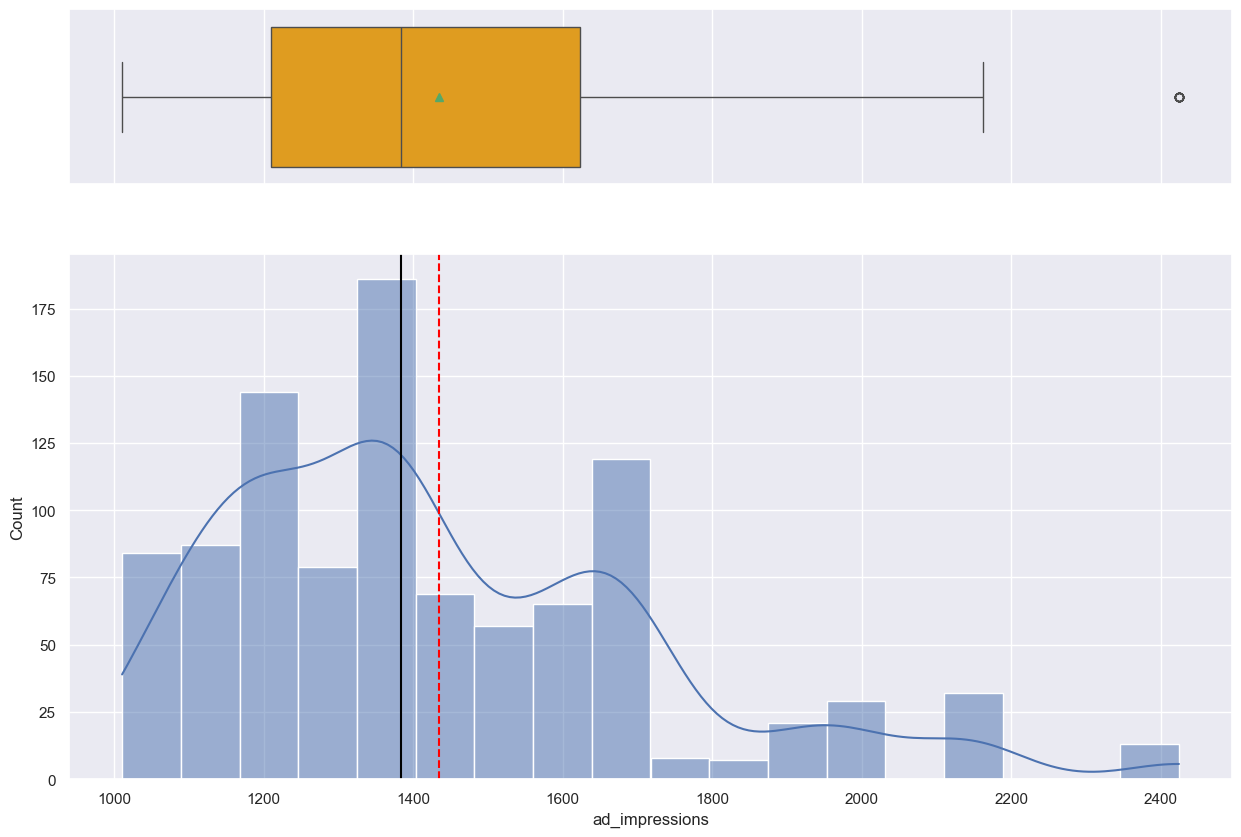

In [58]:
histogram_boxplot(df, "ad_impressions", kde=True)

**Observation**

*	The distribution of the ad_impressions that impact the first day viewership of the contents is slightly right skewed.
*	The mean value is slightly greater than the median ad_impressions
*	The median value of ad_impressions of the platform is less than 1400 million during the past week.
*	Sometimes about 2400 million ad_impressions impact the first day content viewership and this count is considered to be an outlier value in this data set.
*	There is a spike at ~1700 million, indicating that there are ad campaigns that impact the first day content views. 

### **Views_trailer**

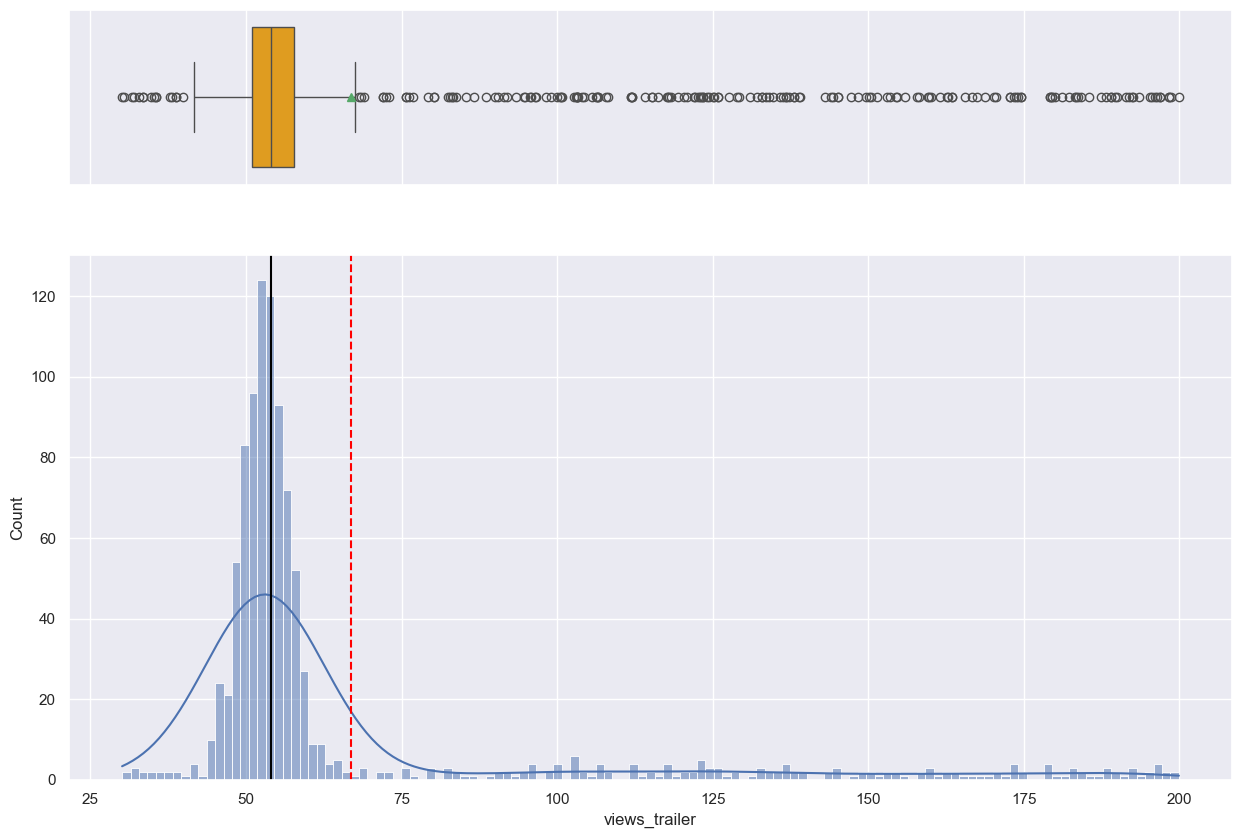

In [62]:
histogram_boxplot(df, "views_trailer", kde=True)

**Observation**

*	The distribution of the views_trailer that impact the first day viewership of the contents is heavily right skewed.
*	The mean value is greater than the median views_trailer and it is at the end of the right tail.
*	The median value of trailer views of the content is ~54 million during the past week.
*	As the distribution is positively skewed, the trailer views greater than the mean value are seen as outliers and the maximum trailer views is ~200 million.


### **Views_content**

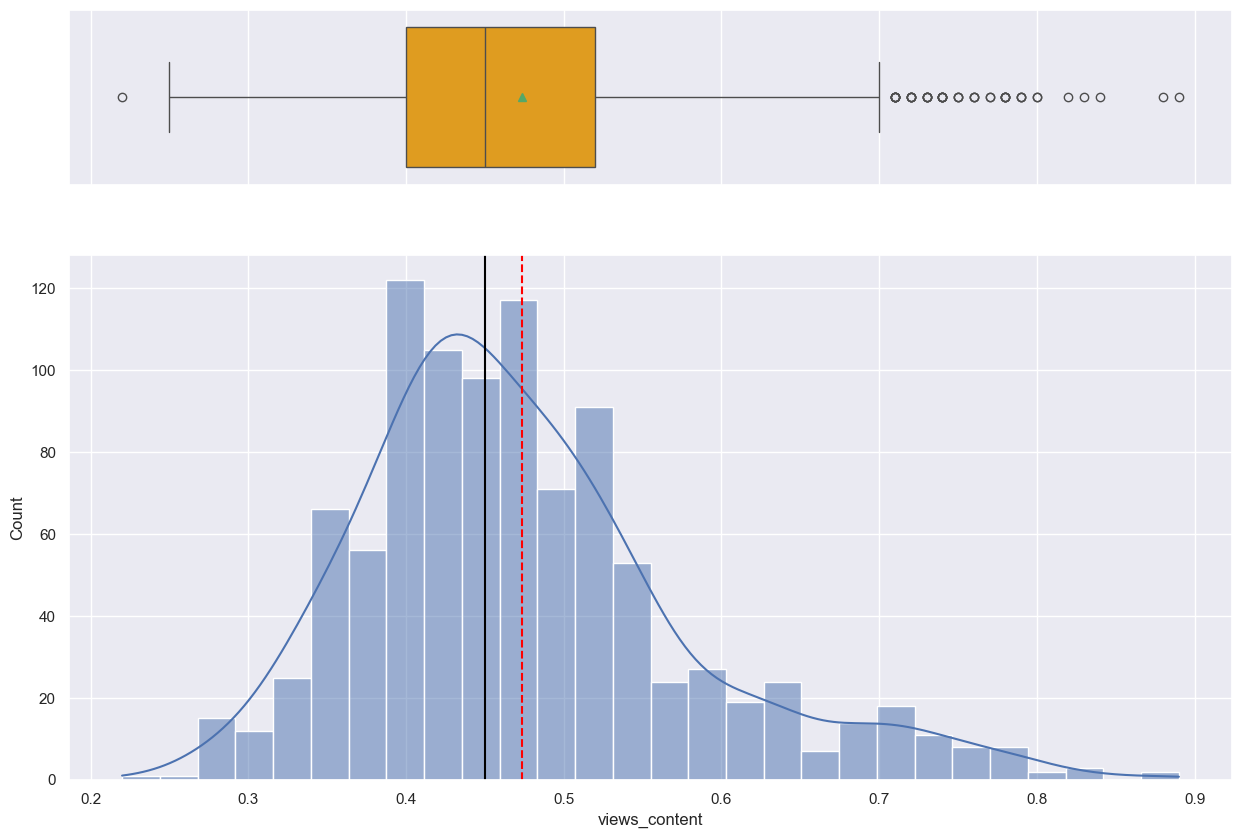

In [66]:
histogram_boxplot(df, "views_content", kde=True)

**Observation**

*	The distribution of the views_content that impact the first day viewership of the contents is slightly right skewed.
*	The mean value is slightly greater than the median views_content and it is less than 0.5 million
*	The median value of content views of the content on the first day is ~0.45 million during the past week.
*	The distribution is slightly positively skewed, the content views greater than 0.7 million and less than 0.25 million are considered as outliers

### **Labeled Barplots for categorical columns**

In [70]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
        )
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
      
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

### **Genre**

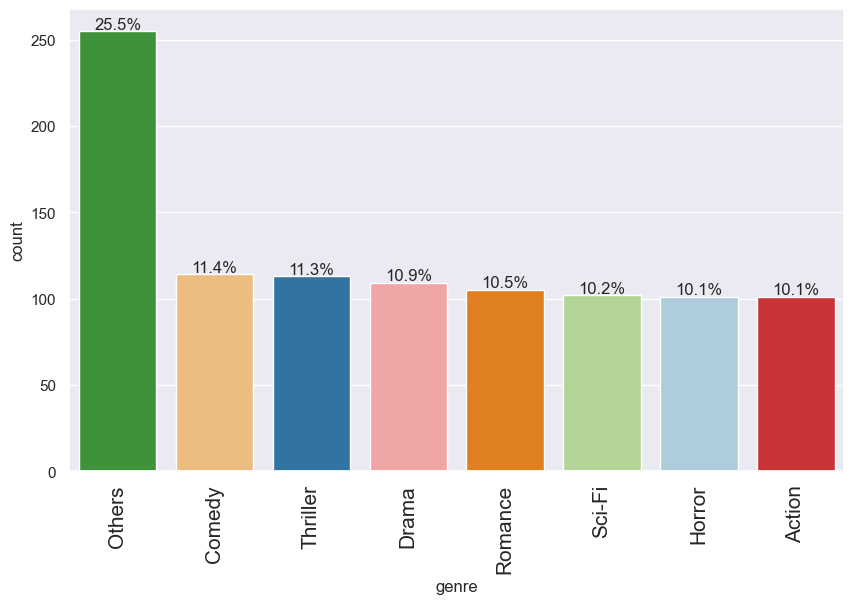

In [73]:
labeled_barplot(df, "genre", perc=True)

**Observation**

* Nearly 25.5% of the first day released contents fall under the `Others` category
* The first day contents related to `Comedy` and `Thriller` are almost the same followed by the `Drama` and the `Thriller`.
* Similarly, `Sci-Fi`, `Horror` and `Action` content counts remained the same in the platform

### **Dayofweek**

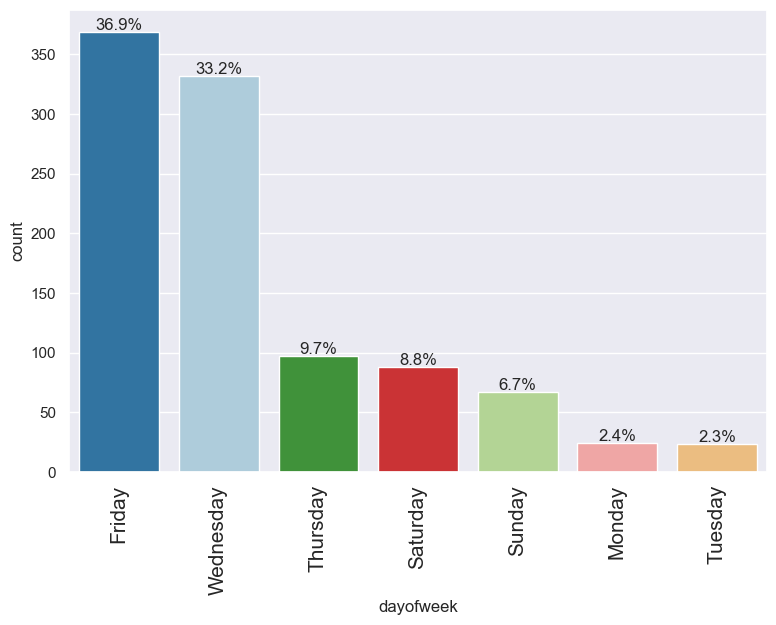

In [77]:
labeled_barplot(df, "dayofweek", perc=True)

**Observation**

* The platform had most of its contents released on `Fridays` and `Wednesdays`
* Less contents were released on `Mondays` and `Tuesdays`

### **Season**

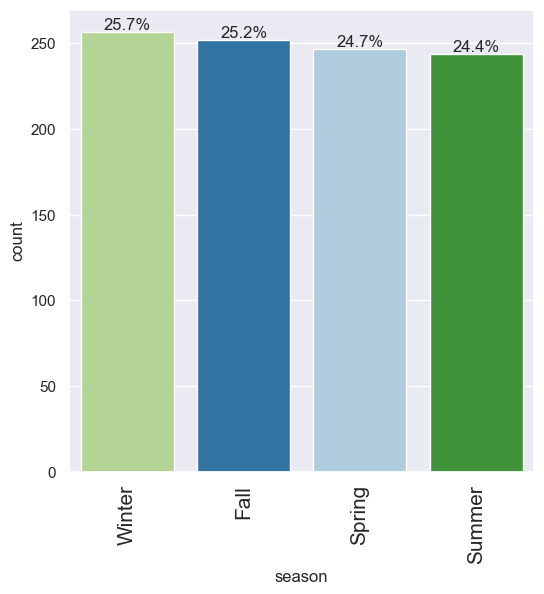

In [81]:
labeled_barplot(df, "season", perc=True)

**Observation**

* The higher percentage of contents were released during `Winter` and `Fall`
* But `Spring` and `Summer` too more or less had a similar percentage of released contents.

### **Major_sports_event**

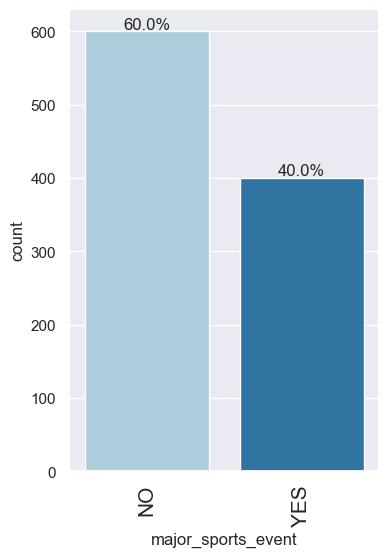

In [85]:
labeled_barplot(df, "major_sports_event", perc=True)

**Observation**

* Almost 60% of the contents were released when there was no major sport event.

## **Bivariate Analysis**

### **Correlation between numerical variables**

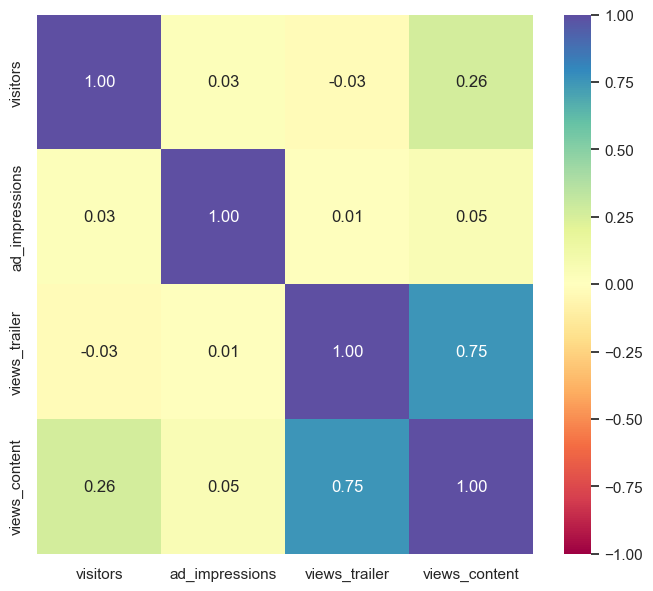

In [90]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,7))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation** 

* There is a high positive correlation between `views_trailer` and `views_content`. This helps us understand that the first day viewership is positively related to the number of trailer views.
* There is also a mild positive correlation between the number of `visitors` and the `views_content`. This also helps us understand that the most of the visitors prefer viewing the content on the first day of its release.

### **Pairplot between numerical variables**

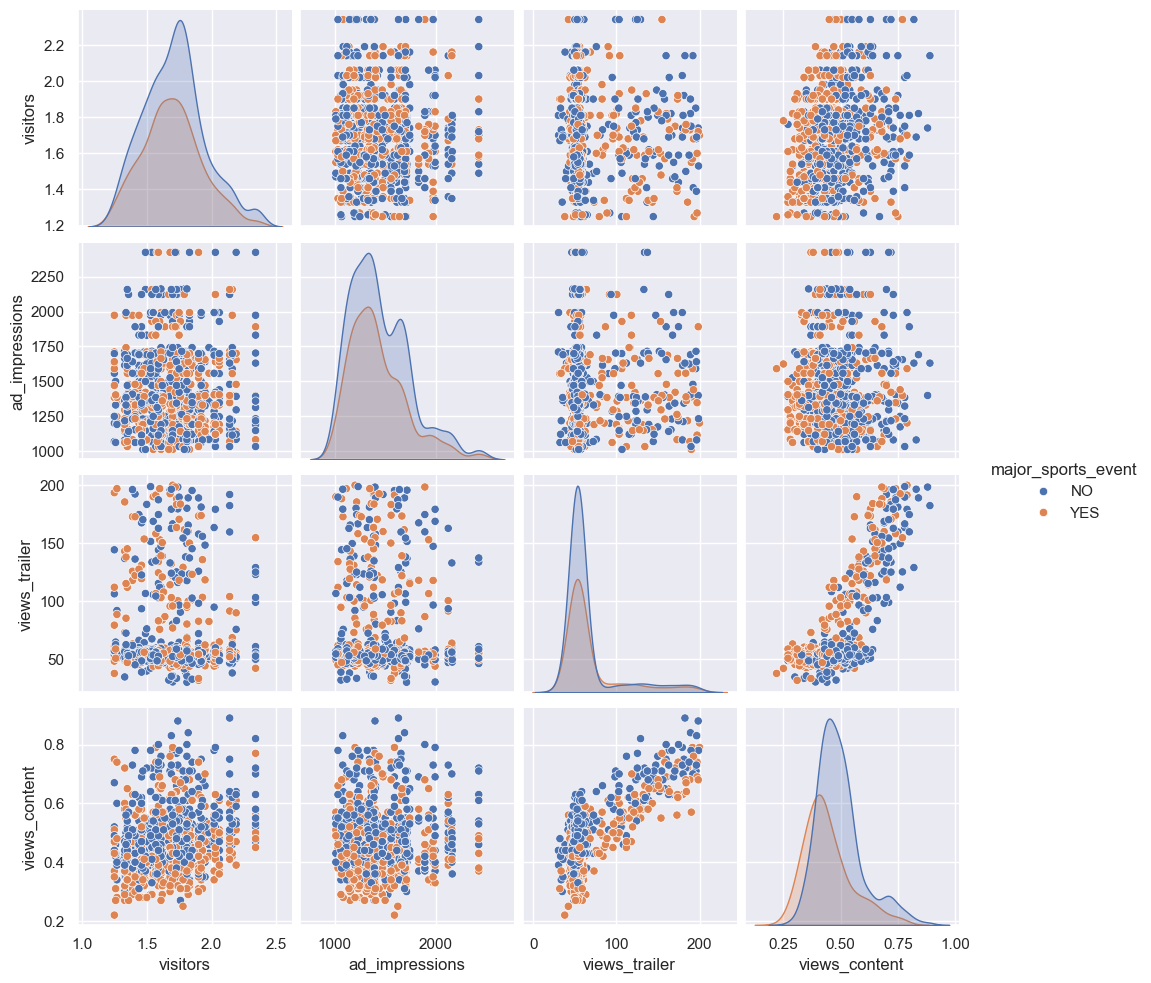

In [94]:
sns.pairplot(data=df, hue="major_sports_event")
plt.show()

**Observation** 

* Through pair plot also we can visualize a positive correlation  between `views_trailer` and `views_content`. This helps us understand that viewers who watch the trailers also prefer to watch the contents on its first day release.

### **Let's check the variation in `views_content` with some of the other categorical variables.**

### **Views_content Vs Genre with hue= major_sports_event**

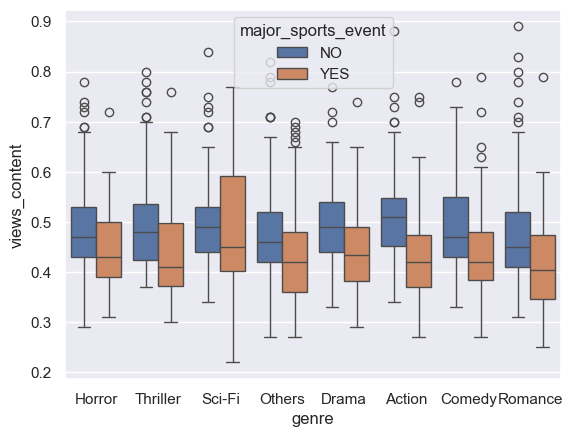

In [99]:
sns.boxplot(x="genre", y="views_content", hue ='major_sports_event', data=df)
plt.show()

**Observation** 

* All genres have certain outliers
* It can be observed that the first day viewership is consistently high when there was no major sport events taking place.
* It is also observed that even when there was a major sports event, the scientific fiction (`Sci-Fi`) contents were on demand attracting more of its first day viewers.

### **Views_contents Vs Genre without hue**

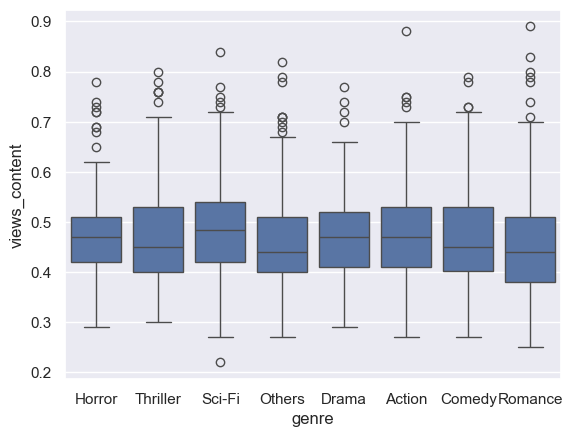

In [103]:
sns.boxplot(x="genre", y="views_content", data=df)
plt.show()

**Observation:**

*	All genres have certain outliers
*	It is clearly observed that `Sci-Fi` has a higher number of content views compared to other genres
*	The `Drama` and `Action` has almost equal median values.
*	The 25% of `Romance` genre is less compared to all genres and at the same time has the maximum outlier too.


### **Views_contents Vs Dayofweek with hue**

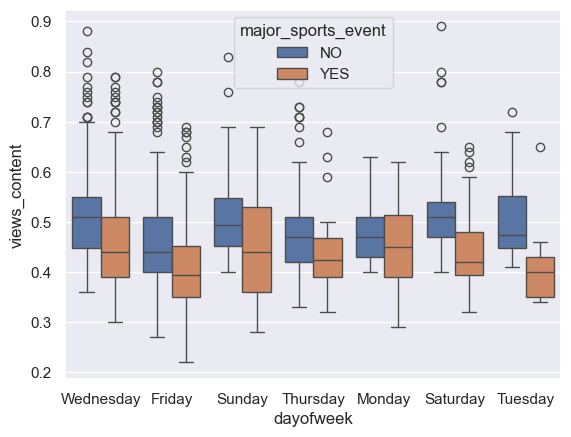

In [107]:
sns.boxplot(x="dayofweek", y="views_content", hue ='major_sports_event', data=df)
plt.show()

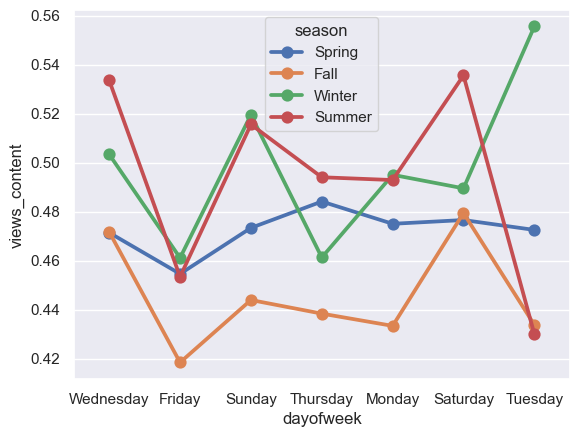

In [109]:
sns.pointplot(x="dayofweek", y="views_content", data=df, hue="season", ci=None)
plt.show();

**Observation:**

*	All genres have certain outliers
*	Wednesday had the maximum extreme no. of content views when there was no other major sports event
*	Sundays had the highest no. of content views even when there were major sports events.
*	Fridays had the least no. of content views irrespective of the sports event.
*	Maximum views were during `Sunday` and `Tuesday` during `Winter`, `Wednesday` and `Saturday` during `Summer`.


### **Views_contents Vs season with hue= major_sports_event**

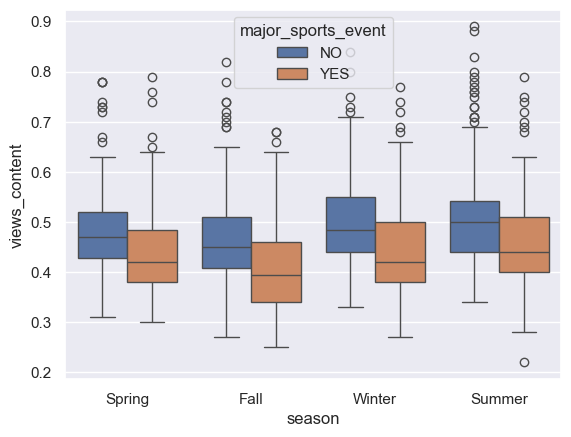

In [113]:
sns.boxplot(x="season", y="views_content", hue ='major_sports_event', data=df)
plt.show()

**Observation:**
    
*	All genres have certain outliers
*	The summer had the extreme low content views with the presence of a sports event and the extreme high content views with the absence of a sports event
*	The median value of content views throughout all the seasons is less with the presence of sports event when compared to the views during the absence of sports event.
*	`Winter` and `Summer` had good number of content views compared to the `Spring` and `Fall`.


### **Let's check the variation in `visitors` with some of the other categorical variables.**

### **Visitors Vs genre with hue=major_sports_event**

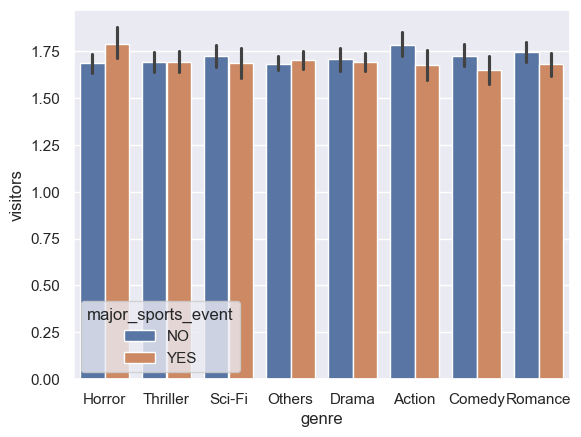

In [118]:
sns.barplot(x="genre", y="visitors", hue="major_sports_event", data=df)
plt.show()

**Observation:** 

*	The horror type contents attract highest average number of visitors during the past week even with a presence of major_sports_event.
*	Similarly action type contents attract highest average number of visitors during the past week while there is no other sports type of events.
*   Thriller genre always have an equal no. of visitors even with or without a major_sports_event.


### **Visitors Vs dayofweek with hue=major_sports_event**

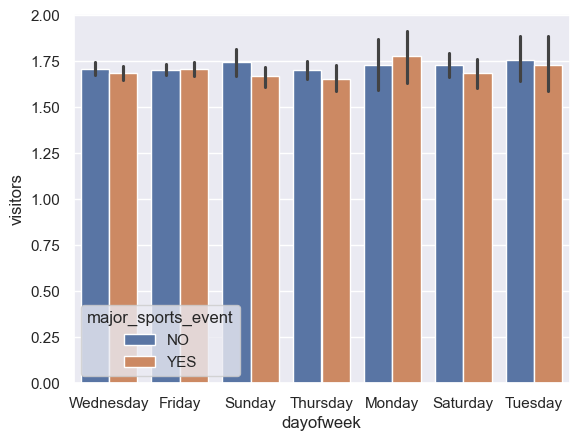

In [122]:
sns.barplot(x="dayofweek", y="visitors", hue="major_sports_event", data=df)
plt.show()

**Observation:** 

*	During the past week `Monday` attracted highest average number of visitors even with a presence of major_sports_event.
*	Similarly `Sunday` and `Tuesday` attracted  highest average number of visitors while there is no other sports type of events.
*   `Friday` and `Wednesday` almost had an equal no. of visitors even with or without a major_sports_event.


### **Visitors Vs season with hue=major_sports_event**

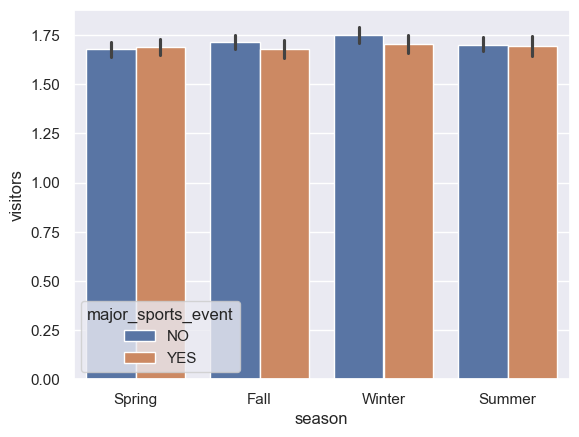

In [126]:
sns.barplot(x="season", y="visitors",hue="major_sports_event", data=df)
plt.show()

**Observation:** 

*   `Winter` attracted highest average number of visitors while there is no other sports type of events.
*	`Summer` and `Spring` almost had an equal no. of visitors even with or without a major_sports_event.


### **Visitors Vs season with hue=genre**

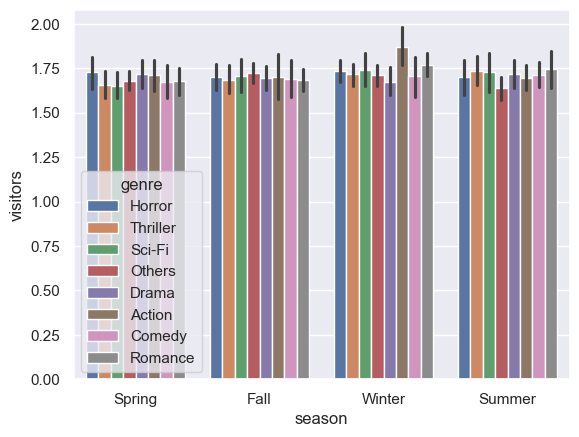

In [130]:
sns.barplot(x="season", y="visitors",hue="genre", data=df)
plt.show()

**Observation:** 

*   Overall, `Winter` attracted highest average number of visitors especially for `Action`  type of contents
*	`Summer`, `Spring` and `Fall` almost had an equal no. of visitors for various type of genres.

### **Visitors Vs season with hue=dayofweek**

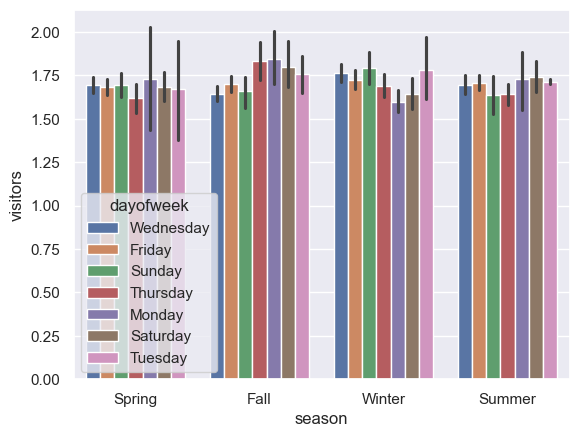

In [134]:
sns.barplot(x="season", y="visitors",hue="dayofweek", data=df)
plt.show()

**Observation:** 

*   During `Summer`, `Spring` and `Fall`, `Monday` had most of the visitors 
*	During `Fall,` `Thursday` attracted almost equal no. of average visitors as `Monday` 
*   During `Winter`, `Sunday` and `Tuesday` had the highest and same no. of visitors
*   But during `Fall` and `Summer`, `Sunday` had the least no. of visitors

### **Visitors Vs major_sports_event**

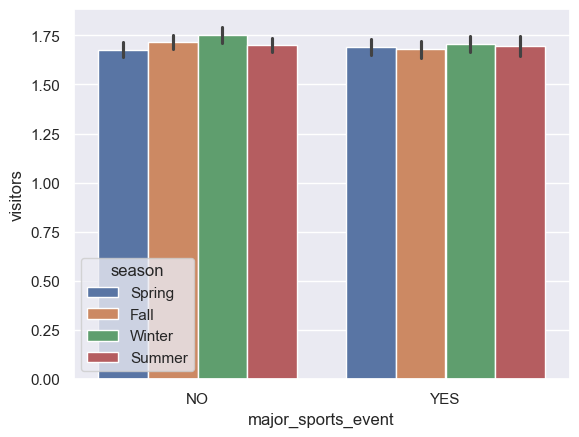

In [138]:
sns.barplot(x="major_sports_event", y="visitors", hue='season', data=df)
plt.show()

**Observation:** 

*   Irrespective of the happening of a major_sports_event, all the seasons attracted almost an even average no. of visitors.

### **Let's check the variation in `views_content` with `average no. of visitors` in millions.**

### **Visitors Vs views_content with hue= major_sports_event**

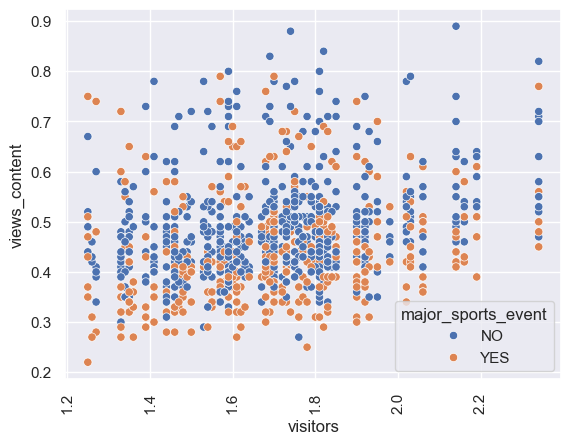

In [143]:
sns.scatterplot(x="visitors", y="views_content", hue ='major_sports_event', data=df)
plt.xticks(rotation=90)
plt.show()

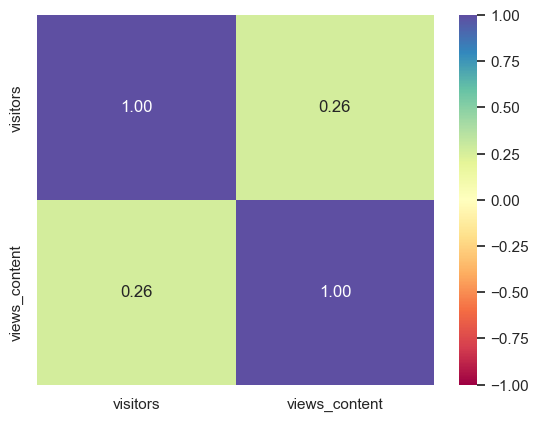

In [144]:
# Plot the heatmap
col_list = ['visitors', 'views_content']
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation:**

* Irrespective of the happening of a major_sports_event, the average no. of visitors to the platform preferred to view the contents on the first day of release.
*	So, the average no. of visitors in millions has positive correlation with the views_contents


### **Let's check the variation in `ad_impressions` with some of the other categorical variables.**

### **Ad_impressions Vs major_sports_event**

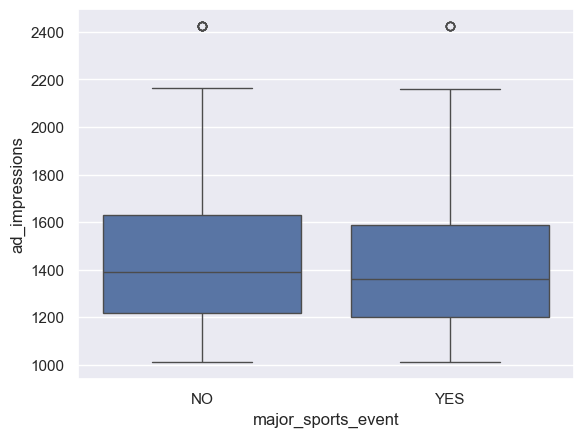

In [150]:
sns.boxplot(x="major_sports_event", y="ad_impressions", data=df)
plt.show()

**Observation:**

*	Irrespective of the happening of a major_sports_event, the response to ad campaigns remained almost same for the contents on its first day of release.


### **Ad_impressions Vs season**

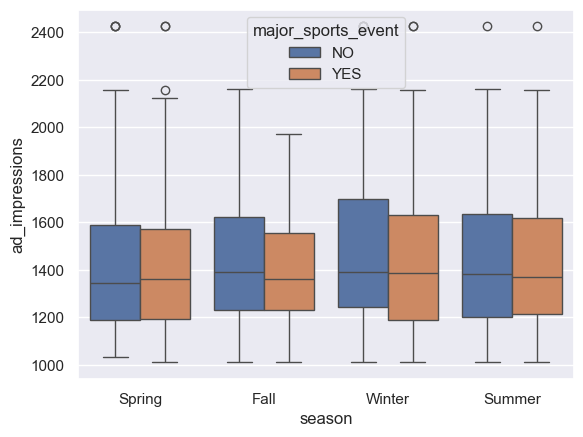

In [154]:
sns.boxplot(x="season", y="ad_impressions", hue='major_sports_event',  data=df)
plt.show()

**Observation:**
  
*	Irrespective of the happening of a major_sports_event, the response to ad campaigns remained almost same for the contents on its first day of release during `Summer` and `Spring`.
*	`Winters` had the highest response to ad campaigns and the response was high when there was no major_sports_event compared to the availability of an event.
*	The ad_impressions during `Fall` was almost same as `Spring`, but without a major_event the response was better to `Spring`


### **Ad_impressions Vs dayofweek**

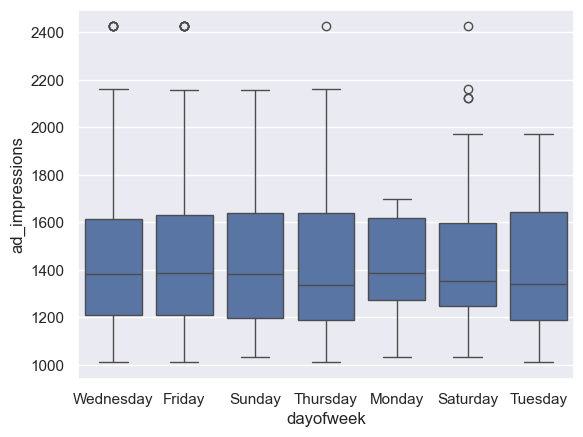

In [158]:
sns.boxplot(x="dayofweek", y="ad_impressions", data=df)
plt.show()

**Observation:**

*	Irrespective of the day of a week, the 75% of  ad_impressions  remained almost the same throughout the week.
*	`Wednesday`,`Friday`,`Sunday` and `Thursday` had the maximum response to ad campaigns, while `Monday` had the minimum
*	The 75% on `Tuesday` and `Saturday` remained almost the same, while `Saturday` had an extreme highest outlier that matched `Wednesday`,`Friday`, `Thursday`.


### **Ad_impressions Vs genre**

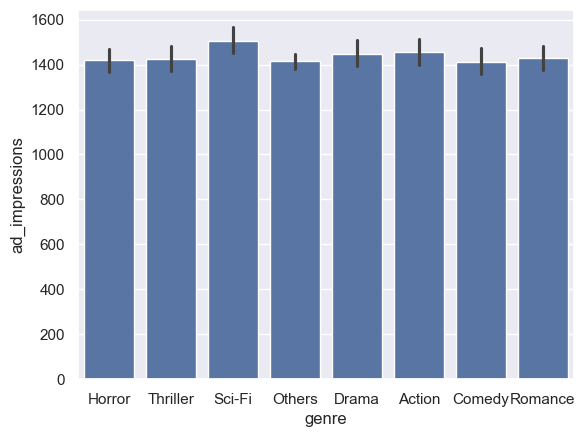

In [162]:
sns.barplot(x="genre", y="ad_impressions", data=df)
plt.show()

**Observation:**

*	Sci-Fi contents had the highest response to ad campaigns.
*	`Horror`, `Thriller`, `Romance`, `Comedy` and `Others` almost had equal response, the response for `Action` and `Drama` was better to these.


### **Let's check the variation in `views_trailer` with some of the other categorical variables.**

### **Views_trailer Vs genre with hue=major_sports event**

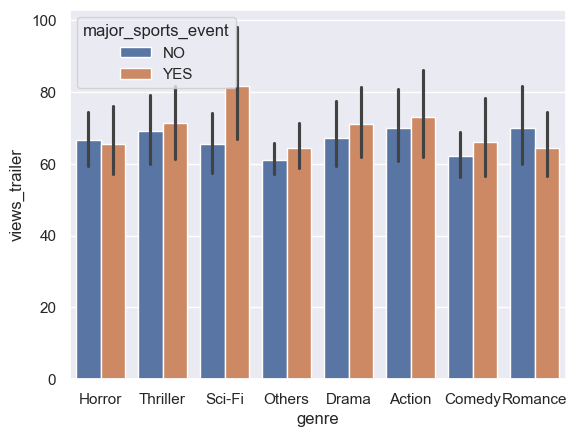

In [167]:
sns.barplot(x="genre", y="views_trailer", hue="major_sports_event", data=df)
plt.show()

**Observation:**
      
*	Most of the genres had the highest no. of trailer views, irrespective of the availability of a major_sports_event
*	`Sci-Fi` genre topped the trailer views with the happening of a major_sports_event
*	Overall, it can be understood that the people prefer watching trailer before visiting the content


### **Let's check the variation in `views_content` with `views_trailer` in millions.**

### **Views_trailer Vs views_content with hue=major_sports event**

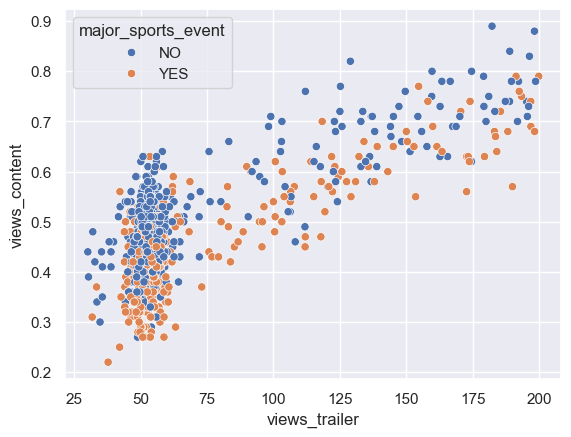

In [172]:
sns.scatterplot(x="views_trailer", y="views_content", hue ='major_sports_event', data=df)
plt.show()

**Observation:**

*	It can be visualized that the people prefer watching trailer before visiting the content
*	So, the trailer views and the content views are clearly positively correlated irrespective of the happening of any major_sports_event.


## **KEY QUESTIONS**

## **What does the distribution of content views look like?**

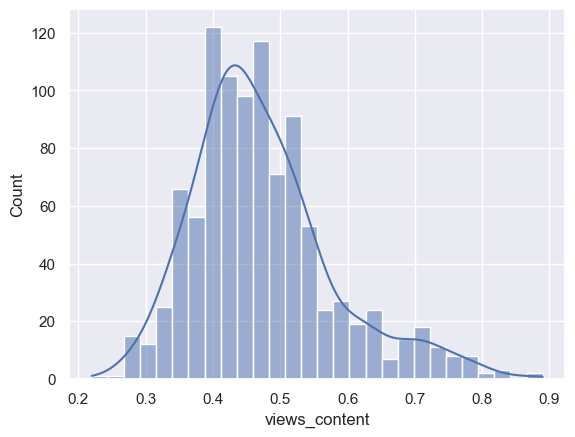

In [177]:
sns.histplot(data=df, x="views_content", kde=True)
plt.show()

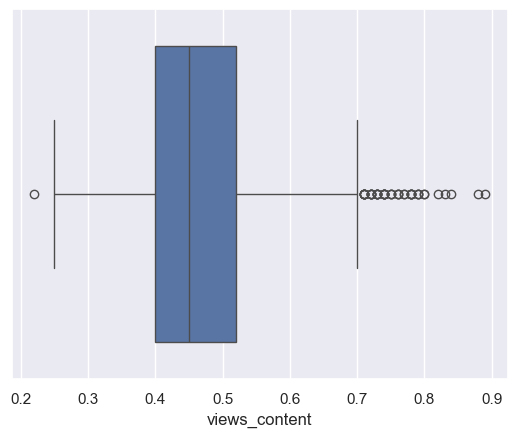

In [179]:
sns.boxplot(data=df,x="views_content")
plt.show()

**Observation:**

*	The distribution of content views is slightly skewed to the right
*	Nearly 75% of the content views are concentrated less than 0.52 million
*   The minimum and the maximum content views are ~0.22million and ~0.7million respectively


## **What does the distribution of genres look like?**

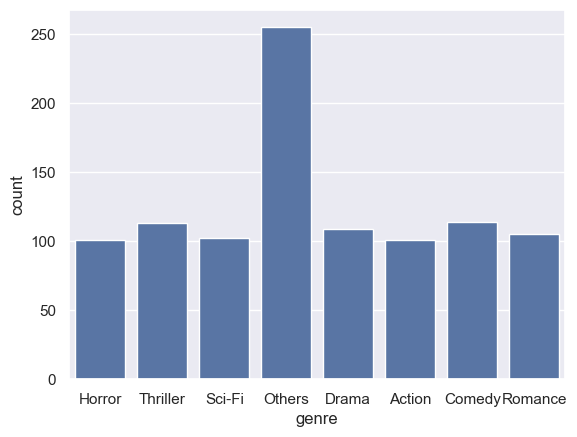

In [183]:
sns.countplot(data=df,x="genre")
plt.show()

**Observation:**

*	Genre is a categorical variable and hence countplots is used to visualize the content counts under each genre
*	More than hundreds of contents under the genre, `Thriller`, `Comedy` ,`Drama` and `Others` attract the first day viewership.
*	Whereas almost hundred contents under the genre `Horror`, `Sci-Fi`, `Action` and `Romance` were also viewed on its first day release.


### **The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?**

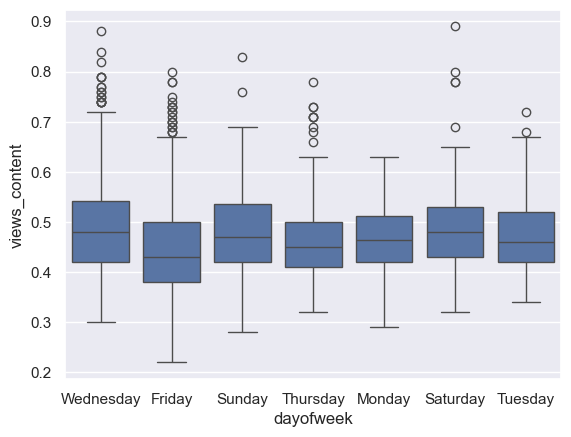

In [187]:
sns.boxplot(x="dayofweek", y="views_content", data=df)
plt.show()

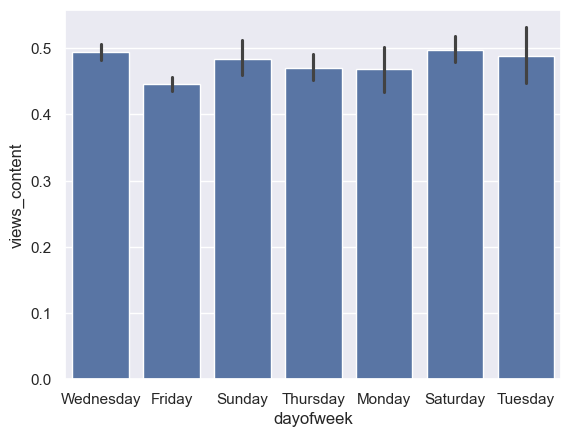

In [189]:
sns.barplot(x="dayofweek", y="views_content", data=df)
plt.show()

**Observation:**

*	The content views is maximum on `Wednesday` and `Saturday` followed by `Sunday` and `Tuesday`
*	`Thursday` and `Monday` almost have equal no. of content views and `Friday` being the least


### **How does the viewership vary with the season of release?**

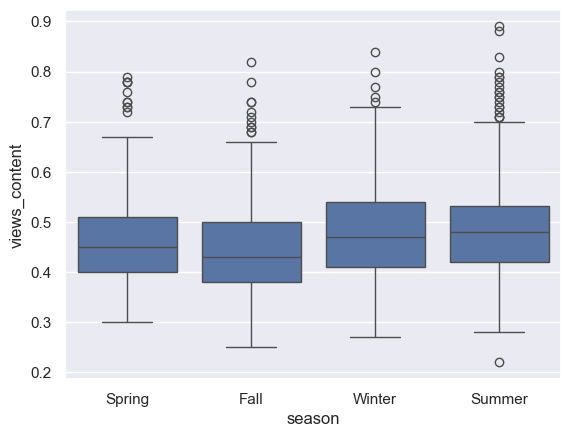

In [193]:
sns.boxplot(x="season", y="views_content", data=df)
plt.show()

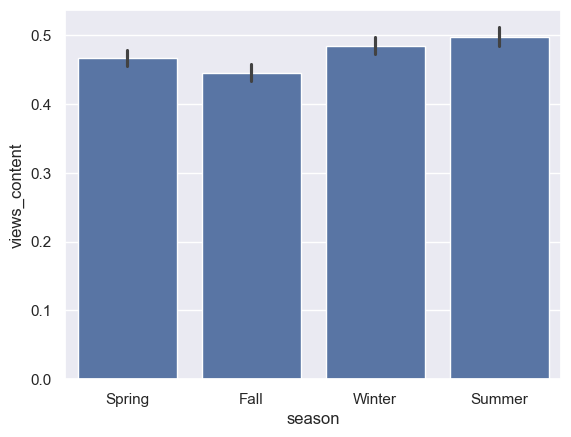

In [195]:
sns.barplot(x="season", y="views_content", data=df)
plt.show()

**Observation:**

*	The `Summer` has extreme outlier content views which can be seen as rare cases
*	Overall `Winter` has the maximum content views
*	The content views during `Spring` and `Fall` looks almost similar, yet `Spring` dominates `Fall` season


### **What is the correlation between trailer views and content views?**

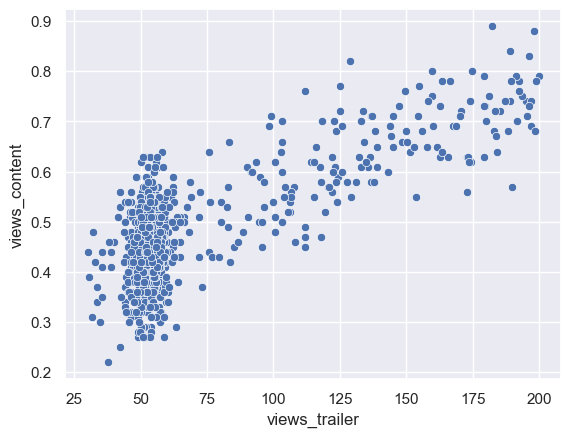

In [199]:
sns.scatterplot(x="views_trailer", y="views_content", data=df)
plt.show()

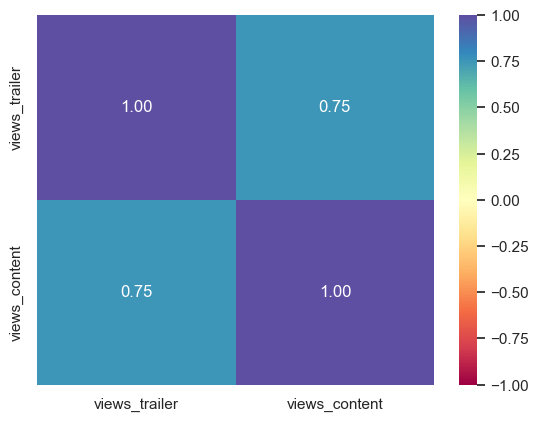

In [201]:
# Plot the heatmap
col_list = ['views_trailer', 'views_content']
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation:** 

*   The `views_trailer` and the `views_content` are positively correlated
*  	The correlation value between `views_trailer` and  `views_content` is 0.75
*	It can be visualized that the people prefer watching trailer before visiting the content and as they watch the trailer, they also view the contents


### **Insights based on EDA**

*	The number of visitors who visited the platform is even throughout the past week.
*	Almost 26% of visitors who visited the platform have also viewed the content.
*	During `Summer`, `Spring` and `Fall`, `Monday` had most of the visitors 
*	During `Winter`, `Sunday` had the highest and the least during `Summer`
*	The visitors who watched the trailer preferred to watch the content as well, that is nearly 75% of visitors who watched trailer, watched the contents. Thus, it is understood that the people prefer watching trailer before visiting the content.
*	Most of the genres had the highest no. of trailer views, irrespective of the availability of a major_sports_event and `Sci-Fi` contents topped them all.
*	Sci-Fi contents had the highest response to ad campaigns.
*	Irrespective of the happening of a major_sports_event, the response to ad campaigns remained almost same for the contents on its first day of release during `Summer` and `Fall`.
*	`Winters` had the highest response to ad campaigns and the response was high when there was no major_sports_event compared to the availability of an event.
*	Irrespective of the day of a week, the 75% of `ad_impressions` remained almost the same throughout the week.
*	The content views is maximum on `Wednesday` and `Saturday` followed by `Sunday` and `Tuesday`. `Friday` has the least no. of views


# **Data Pre-processing**

### **Duplicate value check**

In [208]:
# checking for duplicate values
df.duplicated().sum()

0

* 	It is also observed that there are no duplicate entries in the dataset.

### **Missing value treatment**

In [212]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

### **Outlier Treatment**

* From the above histogram and box plots, we see there are so many outliers in Trailer and Content views.
* These extreme values can be considered for model building, as treating them does not produce an efficient prediction on the model.
* Moreover, when a content becomes successful, exciting and very popular it naturally attracts more number of views on its trailer followed on its content, thereby exceeding its average views
* Hence such extreme values are considered essential to gain valuable insights on the model, thus leaving them untreated.

## **Feature Engineering**
**For the column `major_sports_event`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

* Considering the minimum and maximum values of the major_sports_event, from statistical summary of the dataset, it can be concluded that the column needs replacement of its values with `“YES”` or `“NO”` categorical values. 
* The column `“major_sports_event”` was considered as a categorical column throughout the `Univariate` and `Bivariate` analysis.

In [218]:
#df["major_sports_event"] = df["major_sports_event"].replace({1: "YES", 0: "NO"})
#df.head()

### **Model Building-Linear Regression**

### **Build the model**

#### **Split data**

The entire data set is split into dependent and independent variables and the independent variables together is assigned to a variable and the dependent variable is assigned a variable.

In [307]:
# defining the dependent and independent variables
X = df.drop(["views_content"], axis=1)
y = df["views_content"]

### **Data preparation for modelling**

#### **Create dummy variables**

In [311]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X = X.astype(float)
X.head()

,visitors,ad_impressions,views_trailer,major_sports_event_YES,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.46,1498.41,52.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,48.74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.85,1342.77,49.81,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,55.83,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Values under categorical columns such as `major_sports_event`, `genre`, `dayofweek` and `season` cannot be read into an equation. So one-hot encoding technique is applied to these categorical columns and it is established using a `get-dummies()` function in the pandas dataframe

#### **Add intercept to the data**

In [315]:
# let's add the intercept to data
X = sm.add_constant(X)

#### **Train the data**

**We will now split X and y into train and test sets in a 70:30 ratio.**

In [319]:
# splitting the data in 70:30 ratio for train to test data

x_train1, x_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [321]:
print("Number of rows in train data =", x_train1.shape[0])
print("Number of rows in test data =", x_test1.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


In [323]:
print(x_train1.head())

     const  visitors  ad_impressions  views_trailer  major_sports_event_YES  \
731    1.0      1.64         1992.53          49.62                     0.0   
716    1.0      1.69         2158.03         132.93                     0.0   
640    1.0      1.47         1229.35          54.13                     0.0   
804    1.0      1.49         1010.87         106.62                     0.0   
737    1.0      2.19         1119.90          52.04                     0.0   

     genre_Comedy  genre_Drama  genre_Horror  genre_Others  genre_Romance  \
731           0.0          1.0           0.0           0.0            0.0   
716           0.0          0.0           0.0           0.0            0.0   
640           0.0          0.0           0.0           1.0            0.0   
804           0.0          0.0           1.0           0.0            0.0   
737           0.0          0.0           0.0           0.0            0.0   

     ...  genre_Thriller  dayofweek_Monday  dayofweek_Saturday

In [325]:
print(x_test1.head())

     const  visitors  ad_impressions  views_trailer  major_sports_event_YES  \
507    1.0      1.58         1323.74          57.85                     0.0   
818    1.0      1.54         2122.33          56.82                     0.0   
452    1.0      1.82         1152.29         165.58                     0.0   
368    1.0      2.03         1145.37          59.99                     0.0   
242    1.0      1.75         1060.86          58.99                     0.0   

     genre_Comedy  genre_Drama  genre_Horror  genre_Others  genre_Romance  \
507           1.0          0.0           0.0           0.0            0.0   
818           0.0          0.0           0.0           0.0            0.0   
452           1.0          0.0           0.0           0.0            0.0   
368           0.0          0.0           0.0           0.0            0.0   
242           0.0          0.0           0.0           0.0            0.0   

     ...  genre_Thriller  dayofweek_Monday  dayofweek_Saturday

#### **Fit linear model**

**Make the linear model using statsmodels OLS and print the model summary.**

We will use the `OLS()` function of the statsmodels library to fit the linear model.

* Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration

* The `OLS()` function of the statsmodels.api module is used to perform OLS (Ordinary Least Squares) regression. It returns an OLS object

* The `fit()` method is called on this object for fitting the regression line to the data

* The `summary()` method is used to obtain a table which gives an extensive description about the regression results

In [327]:
# statsmodels does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train1)
# Add constant to test data
x_test1 = sm.add_constant(x_test1)

# fitting a linear model
olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          1.32e-215
Time:                        23:04:40   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### **Comment on the model statistics**

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.785**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **0.0602**


3. **Coefficient of a predictor variable**: It represents the change in the output y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `views_trailer` is **0.0023**.

### **Model Coefficients display**

In [334]:
# let's check the model parameters
olsmodel1.params

const                     0.060157
visitors                  0.129451
ad_impressions            0.000004
views_trailer             0.002330
major_sports_event_YES   -0.060326
genre_Comedy              0.009352
genre_Drama               0.012625
genre_Horror              0.009862
genre_Others              0.006325
genre_Romance             0.000551
genre_Sci-Fi              0.013143
genre_Thriller            0.008708
dayofweek_Monday          0.033662
dayofweek_Saturday        0.057887
dayofweek_Sunday          0.036321
dayofweek_Thursday        0.017289
dayofweek_Tuesday         0.022837
dayofweek_Wednesday       0.047376
season_Spring             0.022602
season_Summer             0.044203
season_Winter             0.027161
dtype: float64

#### Interpretation of Coefficients

* The coefficients tell us how one unit change in x can affect y.

* The sign of the coefficient indicates if the relationship is positive or negative.

* In this data set, for example, the presence of `major_sports_event` occurs with a 0.0603 decrease in `views_content`, and a unit increase in `views_trailer` occurse with a 0.0023 increase in the `views_content`.

* Looking into the coefficients and the observed insights from the EDA, the summary looks like there is no correlation between the predictor variables. Anyways it is important to rule out multicollinearity. Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

* When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

#### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


    - Null hypothesis : Predictor variable is not significant 
    - Alternate hypothesis : Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* However, if the dataset has multicollinearity issue, the p-values will also change.

* We need to ensure that there is no multicollinearity in order to interpret the p-values.

#### Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [339]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [341]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [343]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


**Observations**

- The training $R^2$ is 0.79, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict `views_content` within a mean error of 0.040 on the test data

- MAPE of 9.03 on the test data means that we are able to predict within 9.03% of the `views_content`

# **Checking Linear Regression Assumptions**

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### **TEST FOR MULTICOLLINEARITY**

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [354]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                     99.679317
visitors                   1.027837
ad_impressions             1.029390
views_trailer              1.023551
major_sports_event_YES     1.065689
genre_Comedy               1.917635
genre_Drama                1.926699
genre_Horror               1.904460
genre_Others               2.573779
genre_Romance              1.753525
genre_Sci-Fi               1.863473
genre_Thriller             1.921001
dayofweek_Monday           1.063551
dayofweek_Saturday         1.155744
dayofweek_Sunday           1.150409
dayofweek_Thursday         1.169870
dayofweek_Tuesday          1.062793
dayofweek_Wednesday        1.315231
season_Spring              1.541591
season_Summer              1.568240
season_Winter              1.570338
dtype: float64



**The VIF values indicate that there is no correlation between the independent features**

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [359]:
# initial list of columns
predictors = x_train1.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'views_trailer', 'major_sports_event_YES', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [362]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [364]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          7.03e-224
Time:                        23:53:10   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [366]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [368]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train2* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.785, i.e., our model is able to explain ~78.5% of the variance
* The adjusted R-squared in *olsmodel1* (where we considered the variables with high P-values) was 0.785
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [374]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


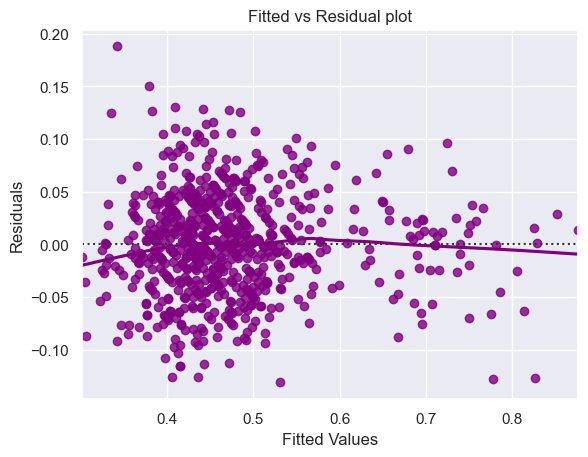

In [377]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

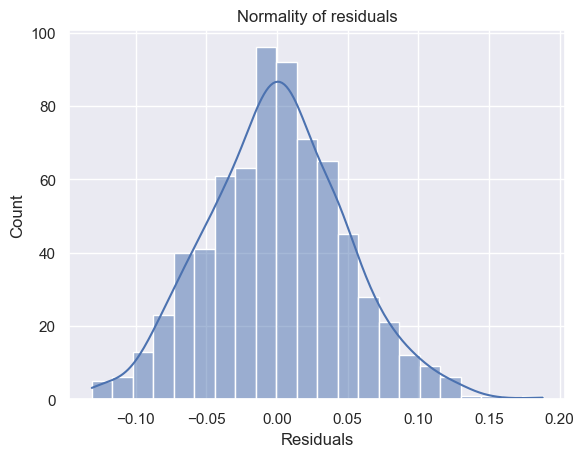

In [384]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

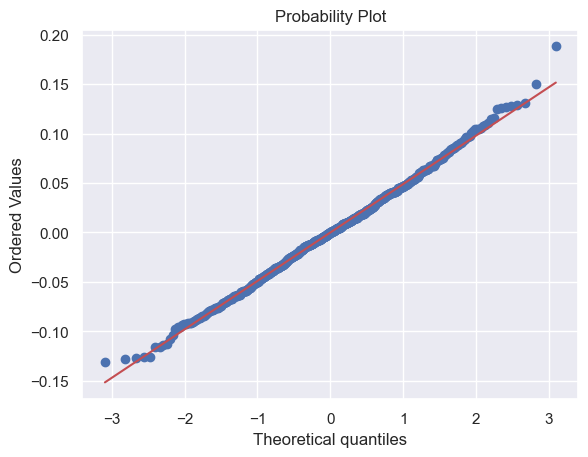

In [387]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [391]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9973155427169234, pvalue=0.31085896470043806)

- Since p-value > 0.05, the residuals are normal as per the Shapiro-Wilk test.

- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [400]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.131361290420075), ('p-value', 0.12853551819087372)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

# **Model performance evaluation**

**All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.**

In [405]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          7.03e-224
Time:                        01:09:58   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observations

* R-squared of the model is **0.789** and adjusted R-squared is **0.786**, which shows that the model is able to explain ~79% variance in the data. This is quite good.

* A unit increase in the `no. of average visitors` will result in a **0.1291** unit increase in the ShowTime platform's content views, all other variables remaining constant.

* The content views on `Saturday` will be **0.0570** units higher than the views on `Friday`, all other variables remaining constant.

* The content views during  `Summer` will be **0.0434** units higher than the views during `Fall`, all other variables remaining constant.

### **Predictions**

### Let us print the linear regression equation

In [412]:
# let's check the model parameters
olsmodel_final.params

const                     0.074671
visitors                  0.129096
views_trailer             0.002331
major_sports_event_YES   -0.060555
dayofweek_Monday          0.032066
dayofweek_Saturday        0.057029
dayofweek_Sunday          0.034386
dayofweek_Thursday        0.015449
dayofweek_Wednesday       0.046495
season_Spring             0.022605
season_Summer             0.043391
season_Winter             0.028231
dtype: float64

In [414]:
# Let us write the equation of linear regression
Equation = "views_content ="
print(Equation, end=" ")
for i in range(len(x_train2.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train2.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train2.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train2.columns[i], ")")

views_content = 0.07467052053721267 + 0.12909581825894126 * ( visitors ) +  0.002330816786164013 * ( views_trailer ) +  -0.06055507818137332 * ( major_sports_event_YES ) +  0.03206580679023629 * ( dayofweek_Monday ) +  0.057028596601651195 * ( dayofweek_Saturday ) +  0.034386229923625 * ( dayofweek_Sunday ) +  0.01544944176997319 * ( dayofweek_Thursday ) +  0.04649480366984812 * ( dayofweek_Wednesday ) +  0.022604915818118004 * ( season_Spring ) +  0.04339100263609978 * ( season_Summer ) +  0.028230557183976823 * ( season_Winter )


### Predictions on test data

In [418]:
# predictions on the test set
pred = olsmodel_final.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


**We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable**

###  Model performance on train set

In [422]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train2, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


###  Model performance on test set

In [424]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test2, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


### Comparison of initial and final models

In [433]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel_train_perf.T, olsmodel_final_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (initial)",
    "Linear Regression (final)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (initial),Linear Regression (final)
RMSE,0.048530,0.048841
MAE,0.038197,0.038385
R-squared,0.791616,0.788937
Adj. R-squared,0.785162,0.785251
MAPE,8.556440,8.595246


In [437]:
# training performance comparison

models_test_comp_df = pd.concat(
    [olsmodel_test_perf.T, olsmodel_final_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (initial)",
    "Linear Regression (final)",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Linear Regression (initial),Linear Regression (final)
RMSE,0.050603,0.051109
MAE,0.040782,0.041299
R-squared,0.766447,0.761753
Adj. R-squared,0.748804,0.751792
MAPE,9.030464,9.177097


* The model is able to explain ~78.5% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 9.17% of the anime ratings

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

# **Actionable Insights and Recommendations**

#### **Actionable Insights**
1. The model is able to explain ~78.5% of the variation in the data and within 9.17% of the content views on the test data, which is good.

   
    **This indicates that the model is good for prediction as well as inference purposes**


3. The model indicates that the most significant predictors of the `views_content` of the ShowTime platform are the following:

    - The average no. of visitors
    - Number of trailer views
    - Availability of a major_sports_event
    - Day of the week 
    - Season of release 
    
(The p-values for these predictors are less than 0.05 in our final model.)

3. If there is one unit increase in the average no. of visitors, the content views increases by 0.1291 units, when all other variables held constant

4. As the number of trailer views increases, the content views also increases

5. The number of content views on the platform on a day with a major_sports_event will be 0.0605 units less than on the day when no sports event is held.

7. Content release on specific days of the week increases its viewership:

   - Saturday - 0.0570 units
   - Wednesday - 0.0465 units
   - Sunday - 0.0344 units
   - Monday - 0.0321 units
   - Thursday - 0.0154 units
There is a respective units of increase in viewership based on the specific day provided all other variables are held constant

8. Content release on specific seasons of the year increases its viewership:

   - Spring - 0.0226 units
   - Summer - 0.0434 units
   - Winter - 0.0282 units
There is a respective units of increase in viewership based on the release of contents during the specific season provided all other variables are held constant

#### **Recommendations**

1. **To improve content viewership, it is recommended to avoid releasing contents on days when major sports events are happening**
2. **As trailer views increases viewership, promoting more trailers can increase first day viewership**
3. **The contents released on Saturday and Wednesday will boost the platforms viewership provided there is no other major sports event available**
4. **The contents released during Summer enhances viewership**
5. **As the data set has minimum number of variables, more detailed information on other predicting factors such as `Age`, `Gender`, `Occupation`, `Geographical location` about the visitors can help in prediction to improve the first day viewership**